                         
                                
                                SPANISH WINES PRICE PREDICTION MODEL 

In [11]:
#Import libraries
import pandas as pd
import os
import numpy as np
from seaborn import boxplot
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,r2_score

# File Extraction and Exploratory Analysis

In [12]:
#Read File
wine = pd.read_csv('data/wines_SPA.csv')

In [13]:
#Saving a copy
wine = wine.copy()

In [115]:
#head it
wine.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [15]:
#Check columns/nulls/Dtypes
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [16]:
#Check overall distribution
wine.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [17]:
#check columns correlation
wine.corr()

,rating,num_reviews,price,body,acidity
rating,1.000000,0.015229,0.544809,0.163033,-0.094553
num_reviews,0.015229,1.000000,-0.030083,0.067106,0.040138
price,0.544809,-0.030083,1.000000,0.153624,-0.032870
body,0.163033,0.067106,0.153624,1.000000,-0.017950
acidity,-0.094553,0.040138,-0.032870,-0.017950,1.000000


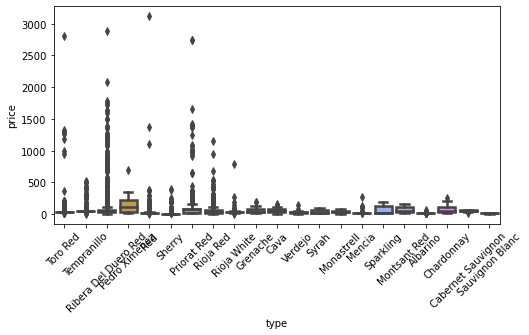

In [18]:
#Check distribution visually with boxplot
figure,ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=wine,y='price',x='type',linewidth=2.5)
plt.xticks(rotation=45);

# Data Cleaning and Manipulation

In [19]:
#Dealing with nulls
wine['year'].fillna(2017,inplace=True)

In [21]:
#Transforming qualitative to quantitatives
wine['year'] = wine['year'].astype(str).str.replace('N.V.','2017').astype(int)

/var/folders/b1/73l5jp1s275_80hff3y8kc6m0000gn/T/ipykernel_26683/4173897160.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  wine['year'] = wine['year'].astype(str).str.replace('N.V.','2017').astype(int)


In [23]:
#Dealing with nulls
wine['acidity']=wine.acidity.fillna(wine.acidity.median())
wine['body']=wine.body.fillna(wine.body.median())
wine['type'].fillna('unknown',inplace=True)


As the wines price range variation is too high, lets share in 4 different price range tables, to merge it later!

In [24]:
#Creating a function accoding to price ranges and to convert categorics to numerics

wine1 = wine[wine['price'] < 70]
wine2 = wine[(wine['price']>=70) & (wine['price']<250)]
wine3 = wine[(wine['price']>=250) & (wine['price']<500)]
wine4 = wine[(wine['price']>=500) & (wine['price']<1800)]
wine5 = wine[wine['price'] >= 1800]

def wine_price_table(x):
    "function to share tables in price range, to further create columns accordinly"
    if x==1:
        return wine1
    elif x==2:
        return wine2
    elif x==3:
        return wine3
    elif x==4:
        return wine4
    elif x == 5:
        return wine5
    else:
        print('Invalid input, enter only numbers, between 1 and 5')
        
        
def winery_num(x):
    "function to further share in winery price range columns via for loop"
    if x==1:
        return winery1_num
    elif x==2:  
        return winery2_num
    elif x==3:
        return winery3_num
    elif x==4:
        return winery4_num
    elif x == 5:
        return winery5_num
    else:
        print('Invalid input, enter only numbers, between 1 and 5') 

def region_num(x):
    "function to further share in region price range columns via for loop"
    if x==1:
        return region1_num
    elif x==2:
        return region2_num
    elif x==3:
        return region3_num
    elif x==4:
        return region4_num
    elif x == 5:
        return region5_num
    else:
        print('Invalid input, enter only numbers, between 1 and 5')
   
 

def type_num(x):
    "function to further share in type price range columns via for loop"
    if x==1:
        return type1_num
    elif x==2:
        return type2_num
    elif x==3:
        return type3_num
    elif x==4:
        return type4_num
    elif x == 5:
        return type5_num
    else:
        print('Invalid input, enter only numbers, between 1 and 5')
        


In [26]:
#Transforming 'wine' categoric column to numerics, shared in respective price range columns,applying Label Encoder

for i in range(1,6):
    labencoder = LabelEncoder()
    labencoder.fit(wine_price_table(i)['wine'])
    wine_price_table(i)['wine'] = labencoder.fit_transform(wine_price_table(i)['wine'])

/var/folders/b1/73l5jp1s275_80hff3y8kc6m0000gn/T/ipykernel_26683/37433855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_price_table(i)['wine'] = labencoder.fit_transform(wine_price_table(i)['wine'])


In [27]:
#Transforming 'winery' categoric column to numerics, shared according to median price range columns
winery1_num = []
winery2_num = []
winery3_num = []
winery4_num = []
winery5_num = []

for i in range(1,6):
    wap = pd.DataFrame(wine_price_table(i).groupby('winery')['price'].median())
    for x in wine_price_table(i).winery:
        x = wap.price[x]
        winery_num(i).append(round(x,0))
        
wine1['winery_num'] = winery1_num 
wine2['winery_num'] = winery2_num 
wine3['winery_num'] = winery3_num 
wine4['winery_num'] = winery4_num
wine5['winery_num'] = winery5_num 

/var/folders/b1/73l5jp1s275_80hff3y8kc6m0000gn/T/ipykernel_26683/3677878376.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine1['winery_num'] = winery1_num
/var/folders/b1/73l5jp1s275_80hff3y8kc6m0000gn/T/ipykernel_26683/3677878376.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine2['winery_num'] = winery2_num
/var/folders/b1/73l5jp1s275_80hff3y8kc6m0000gn/T/ipykernel_26683/3677878376.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [28]:
#Transforming 'region' categoric column to numerics, shared according to median price range columns
region1_num = []
region2_num = []
region3_num = []
region4_num = []
region5_num = []

for i in range(1,6):
    rap = pd.DataFrame(wine_price_table(i).groupby('region')['price'].median())
    for x in wine_price_table(i).region:
        x = rap.price[x]
        region_num(i).append(round(x,0))
        
wine1['region_num'] = region1_num 
wine2['region_num'] = region2_num 
wine3['region_num'] = region3_num 
wine4['region_num'] = region4_num
wine5['region_num'] = region5_num 

/var/folders/b1/73l5jp1s275_80hff3y8kc6m0000gn/T/ipykernel_26683/1065786762.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine1['region_num'] = region1_num
/var/folders/b1/73l5jp1s275_80hff3y8kc6m0000gn/T/ipykernel_26683/1065786762.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine2['region_num'] = region2_num
/var/folders/b1/73l5jp1s275_80hff3y8kc6m0000gn/T/ipykernel_26683/1065786762.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [29]:
#Transforming 'type' categoric column to numerics, shared according to median price range columns
type1_num = []
type2_num = []
type3_num = []
type4_num = []
type5_num = []

for i in range(1,6):
    tap = pd.DataFrame(wine_price_table(i).groupby('type')['price'].median())
    for x in wine_price_table(i).type:
        x = tap.price[x]
        type_num(i).append(round(x,0))
wine1['type_num'] = type1_num 
wine2['type_num'] = type2_num 
wine3['type_num'] = type3_num
wine4['type_num'] = type4_num 
wine5['type_num'] = type5_num 



/var/folders/b1/73l5jp1s275_80hff3y8kc6m0000gn/T/ipykernel_26683/3568348796.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine1['type_num'] = type1_num
/var/folders/b1/73l5jp1s275_80hff3y8kc6m0000gn/T/ipykernel_26683/3568348796.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine2['type_num'] = type2_num
/var/folders/b1/73l5jp1s275_80hff3y8kc6m0000gn/T/ipykernel_26683/3568348796.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [37]:
#concatenating all shared price tables
wine_all = pd.concat([wine1,wine2,wine3,wine4,wine5],ignore_index = True)

In [38]:
#checking table results
wine_all.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,winery_num,region_num,type_num
0,Quinta de la Quietud,320,2015,4.7,256,Espana,Toro,63.75,Toro Red,5.0,3.0,63.0,28.0,28.0
1,Bodegas Mauro,595,2017,4.7,251,Espana,Castilla y Leon,66.07,Tempranillo,4.0,2.0,56.0,37.0,49.0
2,Finca Moncloa,602,2016,4.7,92,Espana,Cadiz,43.13,unknown,4.0,3.0,43.0,32.0,20.0
3,Recaredo,492,2011,4.7,35,Espana,Cava,65.05,Cava,2.0,3.0,35.0,44.0,44.0
4,Miguel Merino,317,2018,4.7,29,Espana,Rioja Alta,46.00,Rioja Red,4.0,3.0,42.0,25.0,28.0


In [39]:
#Dropping remained categoric columns before applying machine learning
wine_all = wine_all.drop(columns=['winery','num_reviews','country','region'])

In [40]:
#Ordenating columns for a better visialization
wine_all = wine_all.loc[:,['winery_num','wine','year','rating','region_num','type_num','body','acidity','price']]

In [41]:
#checking table results
wine_all.head()

,winery_num,wine,year,rating,region_num,type_num,body,acidity,price
0,63.0,320,2015,4.7,28.0,28.0,5.0,3.0,63.75
1,56.0,595,2017,4.7,37.0,49.0,4.0,2.0,66.07
2,43.0,602,2016,4.7,32.0,20.0,4.0,3.0,43.13
3,35.0,492,2011,4.7,44.0,44.0,2.0,3.0,65.05
4,42.0,317,2018,4.7,25.0,28.0,4.0,3.0,46.00


In [71]:
#checking cleaning and manipulation results
wine_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   winery_num  7500 non-null   float64
 1   wine        7500 non-null   int64  
 2   year        7500 non-null   int64  
 3   rating      7500 non-null   float64
 4   region_num  7500 non-null   float64
 5   type_num    7500 non-null   float64
 6   body        7500 non-null   float64
 7   acidity     7500 non-null   float64
 8   price       7500 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 527.5 KB


In [36]:
#checking columns correlation after dataset preparation
wine_all.corr()

,winery_num,year,rating,region_num,type_num,body,acidity,price
winery_num,1.000000,-0.366262,0.543499,0.974771,0.973699,0.158993,-0.039515,0.977207
year,-0.366262,1.000000,-0.297111,-0.358641,-0.356660,-0.117040,0.153066,-0.389817
rating,0.543499,-0.297111,1.000000,0.531454,0.529354,0.166637,-0.098896,0.544809
region_num,0.974771,-0.358641,0.531454,1.000000,0.998974,0.157305,-0.048003,0.960099
type_num,0.973699,-0.356660,0.529354,0.998974,1.000000,0.156755,-0.048408,0.959533
body,0.158993,-0.117040,0.166637,0.157305,0.156755,1.000000,-0.026806,0.161068
acidity,-0.039515,0.153066,-0.098896,-0.048003,-0.048408,-0.026806,1.000000,-0.039905
price,0.977207,-0.389817,0.544809,0.960099,0.959533,0.161068,-0.039905,1.000000


# Modeling


In [108]:
# Defining X and y to apply ML, and deletinf winery_num and region_num columns due data leaking!
X = wine_all.drop(['price','winery_num','region_num',],axis=1)
y = wine_all['price']

In [116]:
#Applying Lenear Regression and model fitting
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [49]:
#checking RMSE score
model.score(X,y)

0.9249639120801734

In [81]:
#Checking predicted results
y_pred = model.predict(X)
y_pred

array([  58.44880162,   64.58309739,   47.34053043, ..., 2784.38258166,
       3153.93267727, 2783.26521989])

In [82]:
#Creating a predicted model table
wines_SPA_predicted = wine.drop(columns=['price'])

In [83]:
#Creating the price predicted column
wines_SPA_predicted['price_predicted'] = y_pred

In [57]:
# checking price predicted dataset
wines_SPA_predicted

,winery,wine,year,rating,num_reviews,country,region,type,body,acidity,price_predicted
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,Toro Red,5.0,3.0,58.448802
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,Tempranillo,4.0,2.0,64.583097
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,47.340530
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,75.057072
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,53.985312
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,Rioja Red,4.0,3.0,2861.884021
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,Priorat Red,4.0,3.0,2571.379524
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,Red,4.0,3.0,2784.382582
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,3153.932677


In [60]:
#deploying price predicted dataser
wines_SPA_predicted.to_csv('data/wine_SPA_predicted.csv')

# Other modeling verifications

In [61]:
#Applying train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
#Applying XGB regressor and fitting model
model1 = XGBRegressor()
model1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [63]:
#checking prediction
y_pred1 = model.predict(X_test)
y_pred1

In [65]:
#checking XGB score
model1.score(X_test,y_test)

0.9651624760145696

In [66]:
#Applying Gradient Boosting Regressor and fitting model 
model2 = GradientBoostingRegressor()
model2.fit(X_train,y_train)

GradientBoostingRegressor()

In [67]:
#checking prediction
y_pred2 = model2.predict(X_test)
y_pred2

In [69]:
#checking GBR score
model2.score(X_test,y_test)

0.9633866564151858